## **Machine Learning - WNBA Playoffs Prediction**
This notebook will focus on the undestanding of the data. We will be using SQLite to store the data due to its scalability & the fact that it's a relational schema.

https://docs.python.org/3/library/sqlite3.html

Import sqlite3 and connect to database file

### **Imports**

In [1]:
import pandas as pd
import sqlite3
import understanding_utils as uu 
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt

### **Database Connection Setup**

In [2]:
db = sqlite3.connect("db/ac.db")
db_cur = db.cursor()

### **Descriptive Statistics**

Descriptive statistics offer valuable metrics for understanding and summarizing data, assisting in data analysis and decision-making.

In [3]:
tables = uu.get_db_tables(db_cur)

for table in tables:   
    print(f"\033[1m{table}\033[0m")
    num, non_num = uu.parse_columns_type(db_cur,table)
    uu.calculate_summary_statistics(db_cur,table,num)
    print('\n')


awards_players
+-------------+---------+---------+-----------------+-------+-------+
| Attribute   |   Count |    Mean |   Std Deviation |   Min |   Max |
+=============+=========+=========+=================+=======+=======+
| year        |      95 | 5.78947 |            2.75 |     1 |    10 |
+-------------+---------+---------+-----------------+-------+-------+


coaches
+-------------+---------+-----------+-----------------+-------+-------+
| Attribute   |   Count |      Mean |   Std Deviation |   Min |   Max |
+=============+=========+===========+=================+=======+=======+
| year        |     162 |  5.31481  |            2.9  |     1 |    10 |
+-------------+---------+-----------+-----------------+-------+-------+
| stint       |     162 |  0.364198 |            0.69 |     0 |     2 |
+-------------+---------+-----------+-----------------+-------+-------+
| won         |     162 | 14.6728   |            6.4  |     0 |    28 |
+-------------+---------+-----------+------------

Players:
- All players have the same value for first season & last season (0)
- Some players have height and weight with the value 0
- Maybe it's possible to estimate a player's position based on his height & weight

Teams:
- The attributes 'seeded', 'tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB' has the value 0 for all teams


**Checking for missing values (N/A)**

It's normal for large datasets to have missing values, which needs to be handled early on.

In [4]:
for table in tables:   
    print(f"\033[1m{table} - Missing Values:\033[0m")
    uu.check_missing_values(db_cur,table)
    print('\n')

awards_players - Missing Values:
There are no missing values!

coaches - Missing Values:
There are no missing values!

players - Missing Values:
Column 'pos' has missing values: True - 8.73%
Column 'college' has missing values: True - 18.70%
Column 'collegeOther' has missing values: True - 98.77%


teams - Missing Values:
Column 'divID' has missing values: True - 100.00%
Column 'firstRound' has missing values: True - 43.66%
Column 'semis' has missing values: True - 73.24%
Column 'finals' has missing values: True - 85.92%


teams_post - Missing Values:
There are no missing values!

series_post - Missing Values:
There are no missing values!

players_teams - Missing Values:
There are no missing values!



**Counting Distinct Values**

It may help us categorize attributes into continuous, discrete & categorical depending on the number of distinct values.

In [5]:
uu.count_distinct_values(db_cur)

awards_players - distinct values: 
╒═════════════╤══════════════════╕
│ Attribute   │   Distinct Count │
╞═════════════╪══════════════════╡
│ year        │               10 │
├─────────────┼──────────────────┤
│ playerID    │               58 │
├─────────────┼──────────────────┤
│ award       │               12 │
├─────────────┼──────────────────┤
│ lgID        │                1 │
╘═════════════╧══════════════════╛


coaches - distinct values: 
╒═════════════╤══════════════════╕
│ Attribute   │   Distinct Count │
╞═════════════╪══════════════════╡
│ year        │               10 │
├─────────────┼──────────────────┤
│ stint       │                3 │
├─────────────┼──────────────────┤
│ won         │               29 │
├─────────────┼──────────────────┤
│ lost        │               28 │
├─────────────┼──────────────────┤
│ post_wins   │                8 │
├─────────────┼──────────────────┤
│ post_losses │                6 │
├─────────────┼──────────────────┤
│ coachID     │          

### **Data Understanding**

**In this section we will plot our data, so we can have a better understanding on how they are distributed.**

***Awards_Players Table***

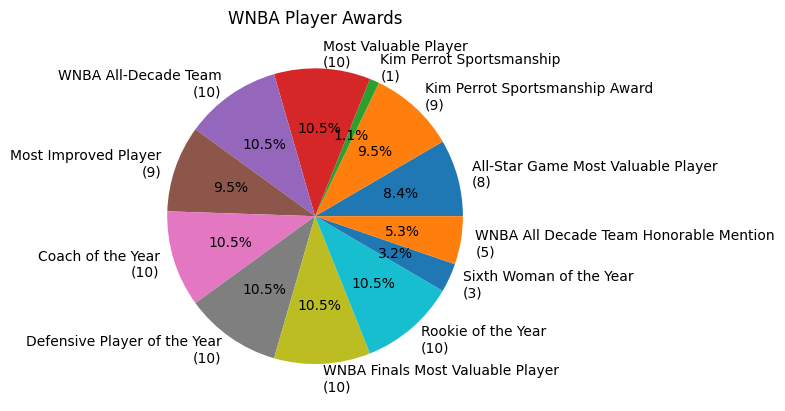

In [6]:
uu.plot_pie_diagram(db_cur,"award","awards_players","WNBA Player Awards")

Here we can see the distribution of the awards. Some of them are missing as their total count is not 10. (One each year)

Surprisingly there is an award for coaches, despite all the others being awarded to players.

***Coaches Table***

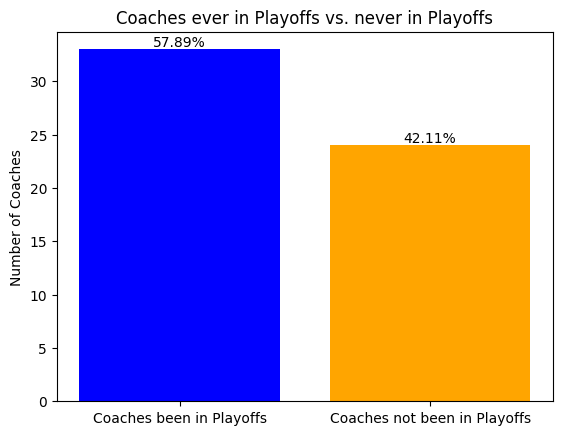

Coach PlayOffs Appearances:
chancva99w - 6
coopemi01w - 6
donovan99w - 6
hugheda99w - 6
laimbbi01w - 6
thibami99w - 6
adubari99w - 4
coylepa99w - 4
whisejo99w - 4
dunnli99wc - 3
wintebr01w - 3
aglerbr99w - 2
bouceje01w - 2
bryanjo01w - 2
harveca99w - 2
mcconsu01w - 2
adamsmi01w - 1
allenso99w - 1
fortnne99w - 1
gaineco01w - 1
laceytr99w - 1
mahorri01w - 1
mchugma99w - 1
meadoma99w - 1
millech99w - 1
peckca99wc - 1
plankju99w - 1
rothsro99w - 1
stanlma99w - 1
thompka99w - 1
walkeda01w - 1
weisery99w - 1
westhpa99w - 1
bibbyhe01w - 0
boguemu01w - 0
brownde01w - 0
coopecy01w - 0
cowenda01w - 0
dailesh99w - 0
darscna99w - 0
dunntr01wc - 0
gilloje01w - 0
grafca99wc - 0
hargrli99w - 0
jenkica99w - 0
kenlaje99w - 0
keyst99wc - 0
liebena01w - 0
maherto99w - 0
overtbo99w - 0
rollitr01w - 0
sharpli99w - 0
shumajo01w - 0
vandehe99w - 0
willifr99w - 0
willigr99w - 0
zierddo99w - 0


In [7]:
uu.plot_playoff_coaches(db_cur)

***Players & Players_Teams Table***

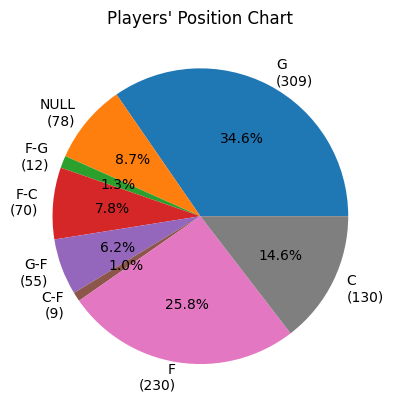

In [8]:
uu.plot_pie_diagram(db_cur, "pos","players", "Players' Position Chart")

Wonder if it's possible by clustering attributes like weight & height to find an approximation for those players with a null position.

In [9]:
uu.players_information(db_cur)

Total Players: - 893
Players that actually played: - 555
Irrelevant Players: - 338


***Teams & Team_Post Table***

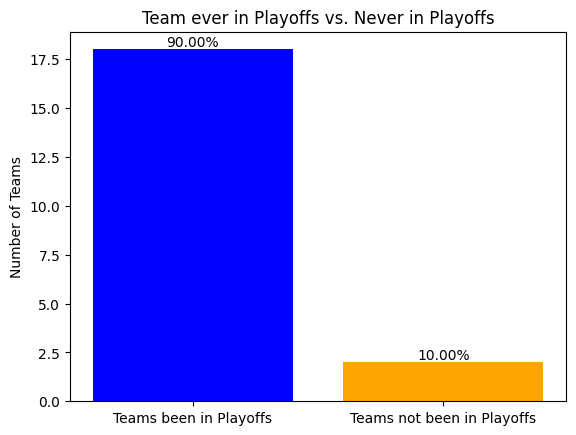

In [10]:
uu.playoffs_teams(db_cur)

In the 10 years of data, there were 20 different teams. Only 2 of them have never gone to playoffs.

Let's see which teams have gone to the playoffs the most times

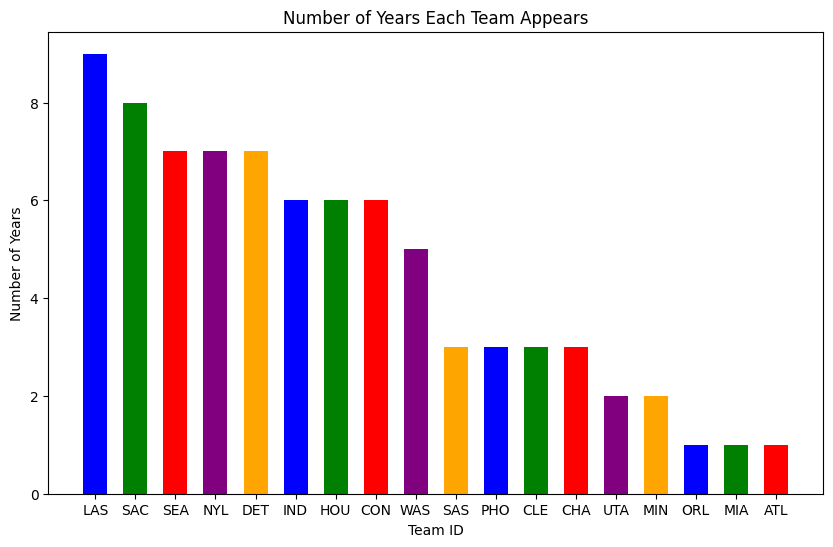

In [11]:
uu.each_team_po_appearances(db_cur)

Now we will see how our binary target is distributed.

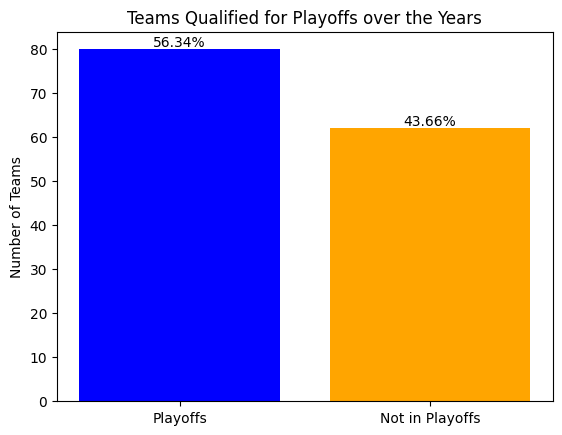

In [12]:
uu.target_distribution(db_cur)

As we can see our dataset is pretty balanced despite the number of teams that qualified to the playoffs being slightly higher than the opposite.

In [13]:
#uu.check_for_outliers(db_cur)